<a href="https://colab.research.google.com/github/Orlikagan/Complete-Python-3-Bootcamp/blob/master/Resident_q2_Orly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
#import libraries
import numpy  as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [20]:
#q2 = pd.read_csv('/content/2.csv')
#q2 = q2[q2.columns[1:]]
#q2 = q2.applymap(lambda v: v[2:].replace(',', '')).astype(float)
#q2

In [21]:
#loading the tables
q2 = pd.read_csv('/content/2.csv')

In [22]:
#Convert 'event_datetime' column to datetime because pandas defoltive reads all as text
q2['Date'] = pd.to_datetime(q2['Date'])

In [23]:
#Using linear regression model in pandas,  first set up the 'x' values I will need to calculate
#and the 'y' value, according to what I wante to compare
X = q2[['Google Spend', 'Facebook Spend', 'YouTube Spend']]
y = q2['Revenue']

In [24]:
#cleaning the table from '$' and ','
X = X.applymap(lambda v: v[2:].replace(',', '')).astype(float)
y = y.apply(lambda v: v[2:].replace(',', '')).astype(float)

In [25]:
x = sm.add_constant(X)

model = sm.OLS(y, x).fit()

result = model.summary()

print(result)

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     158.8
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           1.56e-53
Time:                        08:39:33   Log-Likelihood:                -2417.7
No. Observations:                 212   AIC:                             4843.
Df Residuals:                     208   BIC:                             4857.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.319e+04   5592.594     -2.

In [26]:
#Last step is visualization
q2.Date = pd.DatetimeIndex(q2.Date)
q2.set_index("Date", inplace=True)

In [27]:
q2 = q2.applymap(lambda v: v[2:].replace(',', '')).astype(float) #cleaning all spaces from data

<Axes: xlabel='Date'>

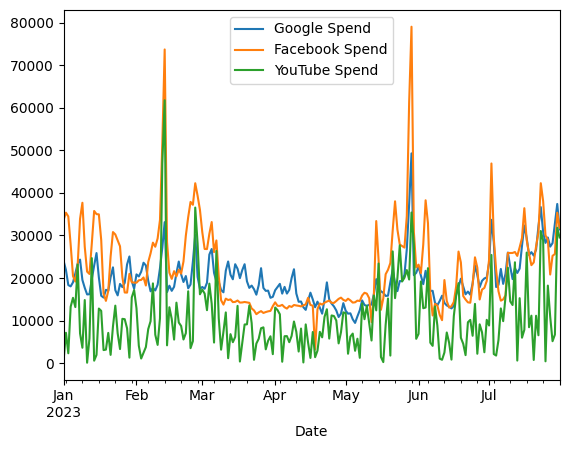

In [28]:
q2[q2.columns[:-1]].plot()  #removing revenue column to see only spend by platform